# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations

The temperature drops as you move from the nothern hemishpere to the southern hemisphere. This may be due to the fact that seasons flip between the hemispheres.

There seems to be no relationship between the latitude and wind, humidity or cloudiness. 

In the nothern hemisphere ther is a strong negative correation between the latitude and maximum temparature. The futher away from the equator we move the lower the temperature gets.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import math
from ratelimit import limits
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/data/weather.csv"
plot_output_folder = "Output/plots"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
         

# Print the city count to confirm sufficient count
len(cities)

603

In [3]:
#define function to separete list into piecs of size n
def chunks(l, n):
    for i in range(0, len(l), n):
    # Create an index range for l of n items:
        yield l[i:i+n]
        
#source: https://www.geeksforgeeks.org/break-list-chunks-size-n-python/

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#make dictionary that comtains all sets os size between 1-50
sample_set = {}
for i , x in enumerate(list(chunks(cities,50))):
    sample_set["Set {0}".format(i+1)] = x
    
#set parametrs and url source
#base_url = "http://api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}"
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

weather_json_data = []

#Pull data from API in loop for all sets
print('Begining Data Retreival')
print('---------------------------')

for set_n in sample_set:
    time.sleep(30)
    for index, city in enumerate(sample_set[set_n]):
        query_url = f"{base_url}q={city}&units={units}&appid={weather_api_key}"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        if weather_json['cod'] == 200:
            weather_json_data.append(weather_json)
            print(f"Processing Record {index+1} of {set_n} | {city}")
        else:
            print('City not found. Skipping...')
            
print('---------------------------')
print('Data Retrieval Complete')
print('---------------------------')

Begining Data Retreival
---------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | deputatskiy
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | namibe
Processing Record 5 of Set 1 | whitehorse
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | airai
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | hilo
City not found. Skipping...
Processing Record 12 of Set 1 | meulaboh
Processing Record 13 of Set 1 | busselton
City not found. Skipping...
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | domoni
Processing Record 17 of Set 1 | boone
Processing Record 18 of Set 1 | chuy
City not found. Skipping...
Processing Record 20 of Set 1 | clemencia
Processing Record 21 of Set 1 | salalah
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | srednekolymsk
Processing Record 24 of Set 1 | albany
Processing Record 25 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:

df_dict = {}

data_points = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed']

#create dictionary value for required data
for x in data_points:
    df_dict[x] = []
    
#loop through all datasets and pull required information for dataframe
for dataset in weather_json_data:
        df_dict['City'].append(dataset['name'])
        df_dict['Cloudiness'].append(dataset['clouds']['all'])
        df_dict['Country'].append(dataset['sys']['country'])
        df_dict['Date'].append(dataset['dt'])
        df_dict['Humidity'].append(dataset['main']['humidity'])
        df_dict['Lat'].append(dataset['coord']['lat'])
        df_dict['Lng'].append(dataset['coord']['lon'])
        df_dict['Max Temp'].append(dataset['main']['temp_max'])
        df_dict['Wind Speed'].append(dataset['wind']['speed'])

        
weather_df = pd.DataFrame(df_dict)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bredasdorp,13,ZA,1584205901,56,-34.53,20.04,69.80,17.22
1,Deputatsky,0,RU,1584205901,97,69.30,139.90,-34.26,1.07
2,Lompoc,90,US,1584205901,67,34.64,-120.46,57.99,6.93
3,Mossamedes,85,AO,1584205901,75,-15.20,12.15,76.44,7.67
4,Whitehorse,20,CA,1584205864,83,60.72,-135.05,1.00,1.90


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [6]:
#latest date of data
as_of_date = weather_df['Date'].max()
as_of_date = datetime.fromtimestamp(as_of_date)
as_of_date = as_of_date.strftime("%m/%d/%Y")

#### Latitude vs. Temperature Plot

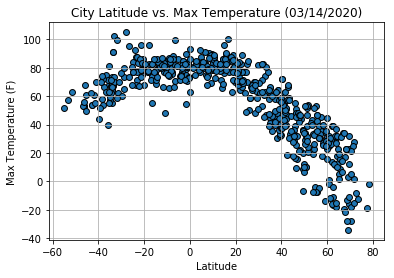

In [7]:
plot1 = weather_df.plot(kind='scatter', x='Lat', y='Max Temp', grid=True, edgecolor='k', s =35)
plot1.set_xlabel('Latitude')
plot1.set_ylabel('Max Temperature (F)')
plot1.set_title(f"City Latitude vs. Max Temperature ({as_of_date})")
plt.savefig(f"{plot_output_folder}/MaxTemp_vs_Lat.png")
plt.show()

The code above is analizing the relationship between the latitude and maxiumun temperature.

#### Latitude vs. Humidity Plot

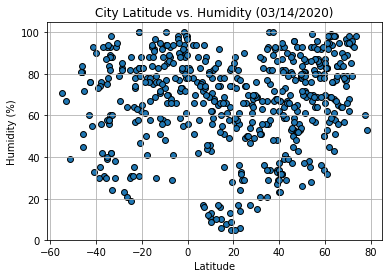

In [8]:
plot2 = weather_df.plot(kind='scatter', x='Lat', y='Humidity', grid=True, edgecolor='k', s =35)
plot2.set_xlabel('Latitude')
plot2.set_ylabel('Humidity (%)')
plot2.set_title(f"City Latitude vs. Humidity ({as_of_date})")
plt.savefig(f"{plot_output_folder}/Humid_vs_Lat.png")
plt.show()

The code above is analizing the relationship between the latitude and humidity.

#### Latitude vs. Cloudiness Plot

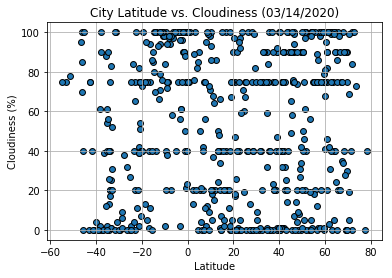

In [9]:
plot3 = weather_df.plot(kind='scatter', x='Lat', y='Cloudiness', grid=True, edgecolor='k', s =35)
plot3.set_xlabel('Latitude')
plot3.set_ylabel('Cloudiness (%)')
plot3.set_title(f"City Latitude vs. Cloudiness ({as_of_date})")
plt.savefig(f"{plot_output_folder}/Cloud_vs_Lat.png")
plt.show()

The code above is analizing the relationship between the latitude and cloudiness.

#### Latitude vs. Wind Speed Plot

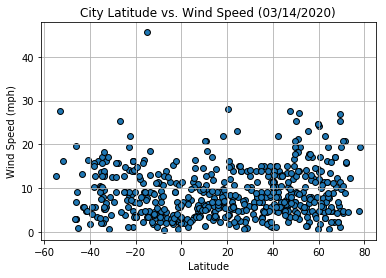

In [10]:
plot4 = weather_df.plot(kind='scatter', x='Lat', y='Wind Speed', grid=True, edgecolor='k', s =35)
plot4.set_xlabel('Latitude')
plot4.set_ylabel('Wind Speed (mph)')
plot4.set_title(f"City Latitude vs. Wind Speed ({as_of_date})")
plt.savefig(f"{plot_output_folder}/Wind_vs_Lat.png")
plt.show()

The code above is analizing the relationship between the latitude and wind speed.

## Linear Regression

In [48]:
# OPTIONAL: Create a function to create Linear Regression plots
def do_regression2(df, x_axis,y_axis, plot_name, title):
    
    df.plot(kind = 'scatter', x= x_axis , y = y_axis)
    x_values = df[x_axis]
    y_values = df[y_axis]
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    print(f"The r-squared is: {rvalue}")
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x=x_values, y=y_values)
    plt.xlabel(f"{x_axis}")
    plt.ylabel(f"{y_axis}")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values)+5,min(y_values)+5),fontsize=15,color="red")
    plt.title(title)
    
    #Save regression plots
    plt.savefig(f"{plot_output_folder}/{plot_name}.png")

    plt.show()

In [49]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[weather_df['Lat'] >= 0]
southern_df = weather_df.loc[weather_df['Lat'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8771650549071942


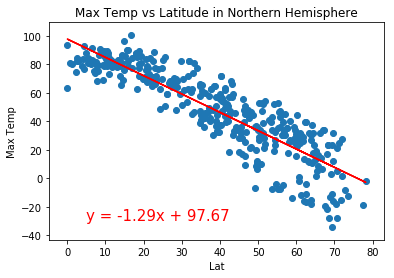

In [50]:
do_regression2(northern_df,'Lat','Max Temp','North_MaxTemp_vs_Lat', 'Max Temp vs Latitude in Northern Hemisphere')

There is a strong negative correlation between latitude and the maximum temperature in the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5345087586306652


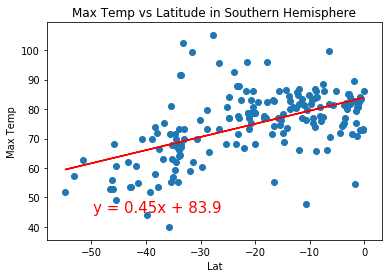

In [60]:
do_regression2(southern_df,'Lat','Max Temp','South_MaxTemp_vs_Lat', 'Max Temp vs Latitude in Southern Hemisphere')

There is a moderate positive correlation between latitude and the maximum temperature in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.29716104428416223


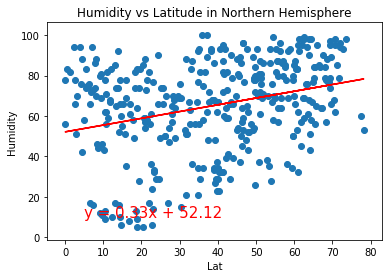

In [52]:
do_regression2(northern_df,'Lat','Humidity','North_Humid_vs_Lat', 'Humidity vs Latitude in Northern Hemisphere')

There is no significant relationship between humidity and latitude in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.28991223119683907


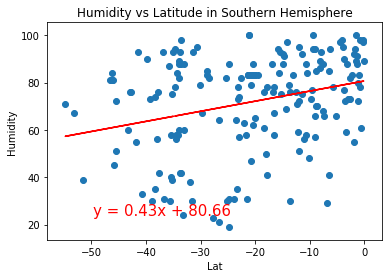

In [53]:
do_regression2(southern_df,'Lat','Humidity','South_Humid_vs_Lat', 'Humidity vs Latitude in Southern Hemisphere')

There is no significant relationship between humidity and latitude in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1502799757077441


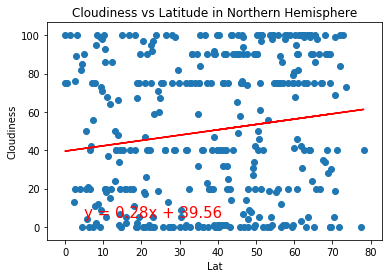

In [54]:
do_regression2(northern_df,'Lat','Cloudiness','North_Cloud_vs_Lat', 'Cloudiness vs Latitude in Northern Hemisphere')

There is no significant relationship between cloudiness and latitude in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.38493809630013676


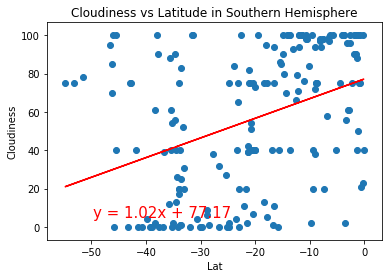

In [57]:
do_regression2(southern_df,'Lat','Cloudiness','South_Cloud_vs_Lat', 'Cloudiness vs Latitude in Southern Hemisphere')

There is no significant relationship between cloudiness and latitude in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.18149668035022193


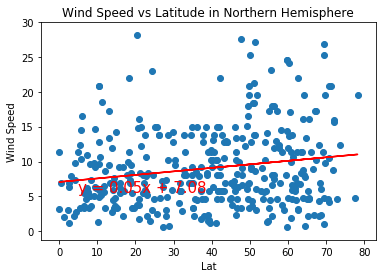

In [58]:
do_regression2(northern_df,'Lat','Wind Speed', 'North_Wind_vs_Lat', 'Wind Speed vs Latitude in Northern Hemisphere')

There is no significant relationship between wind speed and latitude in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.24484732949515436


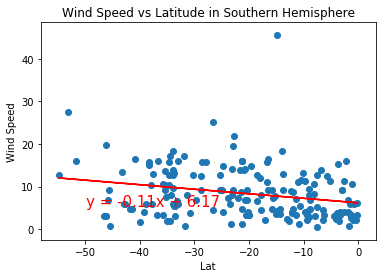

In [59]:
do_regression2(southern_df,'Lat','Wind Speed','South_Wind_vs_Lat', 'Wind Speed vs Latitude in Southern Hemisphere')

There is no significant relationship between wind speed and latitude in the southern hemisphere.

# Output Data

In [26]:
#output dataframe
weather_df.to_csv(output_data_file)